# Linear Lab

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series
from numpy.random import randn

from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
homes = pd.read_csv("http://people.sc.fsu.edu/~jburkardt/data/csv/homes.csv", header=0)
#need to be able to move model along the y-axis
homes["Bias"] = 1
homes.columns = ['Sell','List','Living','Rooms','Beds','Baths','Age','Acres','Taxes','Bias']

X = homes.drop(['Sell'], axis = 1)
y = homes.Sell

homes.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes,Bias
0,142,160,28,10,5,3,60,0.28,3167,1
1,175,180,18,8,4,1,12,0.43,4033,1
2,129,132,13,6,3,1,41,0.33,1471,1
3,138,140,17,7,3,1,22,0.46,3204,1
4,232,240,25,8,4,3,5,2.05,3613,1


This homes data set is actually a relatively small because it has 50 observations and 9 different columns. In the data set there are 9 different features. The first feature is the sell variable which is the final sale price of the house. The next is the list variable which is the price that the house was listed at. The next is the living variable which is the total living are of the home. The next is the rooms variable which is the total number of rooms in the home. The next is the beds variable which is total number of bedrooms in the house. The next is the baths variable which is the number of bathrooms in the house. The next is the age variable which is the age of the house in years. The next is the acres variable which is the total acerage of the home. Finally, the last feature was the taxes feature which was the taxes paid on the house. What our target variable is based is the selling price of the data set. We are trying to predict the selling price of the house based on all the other features in this data set.

## Splitting Data Set 

In [3]:
#split to 30% test set and 70% training data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35, 9), (15, 9), (35,), (15,))

## Linear Regression Using Sklearn

In [4]:
#Creating a linear regression object 
reg = linear_model.LinearRegression()

#Training model using training set 
reg.fit(X_train, y_train)

#Making predictions using testing set
homes_y_pred = reg.predict(X_test)

# The coefficients
print('Coefficients: \n', reg.coef_)

# The mean squared error
print("Mean squared error:", mean_squared_error(y_test, homes_y_pred))

# Explained variance score: 1 is perfect prediction
print("Variance score:", r2_score(y_test, homes_y_pred))

Coefficients: 
 [ 9.57606116e-01 -4.22791901e-01 -6.48342217e-01  4.40616677e+00
  9.85689876e-02 -1.63831726e-02 -4.19765043e-01 -9.01854779e-04
  0.00000000e+00]
Mean squared error: 20.742944502139682
Variance score: 0.990321788772709


## Describe the results

***List variable interpretation*** 
There is a .957 increase in the selling price when there is a 1 unit increase in listing price.    

***Living variable interpretation***
There is a -.422 decrease in the selling price when there is a 1 unit increase in total living room area.

***Room variable interpretation*** 
There is a -.648 decrease in the selling price when there is a 1 unit increase in total number of rooms. 

***Bed variable interpretation*** 
There is a 4.406 increase in the selling price when there is a 1 unit increase in the total number of beds.

***Bath variable interpretation*** 
There is a -.098 decrease in the selling price when there is a 1 unit increase in the total number of baths.

***Age variable interpretation***
There is a -.016 decrease in selling price when there is a 1 unit increase in the age of the house. 

***Acre variable interpreation***
There is a -.419 decrease in selling price when there is a 1 unit increase in acres on the house. 

***Tax variable interpretation***
There is a -.0009 decrease in selling price when there is a 1 unit increase in the taxes paid on the house. 

***Linear Relationship***
Looking at the variance score above, we had a score of .9903. This is an extremely good score because it means that around 99% of our model fit with the data. 

## L2 Regularization

If we wanted to implement the L2 Regularization model in sklearn, it is like using the Ridge Regression model for sklearn. The exact function that we should use is: 

from sklearn import linear_model
>>> reg = linear_model.Ridge(alpha=.5)
>>> reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1]) 

## Implementing Linear Regression By Hand

In [7]:
mu, sigma = 0, 0.1 # mean and standard deviation
theta = np.random.normal(size=(1,len(newX_Train)))

#theta = np.random.randn()
lr =0.01
n_iter = 1000

def  cal_cost(theta,X,y):
    '''
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*(X.T.dot((prediction - y)))
        theta_history[it,:] = theta
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history


In [8]:
newX_Train = homes.drop(['Sell','Living','Rooms','Beds','Baths','Age','Acres','Taxes','Bias'], axis = 1)
newX_Train = newX_Train.values
#newX_Train = newX_Train.values

newY_Train = homes.drop(['List','Living','Rooms','Beds','Baths','Age','Acres','Taxes','Bias'],axis =1)
newY_Train = newY_Train.values
#newY_Train = newY_Train.values

In [9]:
X_b = np.c_[np.ones((len(newX_Train),1)),newX_Train]
theta,cost_history,theta_history = gradient_descent(newX_Train,newY_Train,theta,lr,n_iter)

ValueError: could not broadcast input array from shape (50) into shape (2)

NameError: name 'cost_history' is not defined

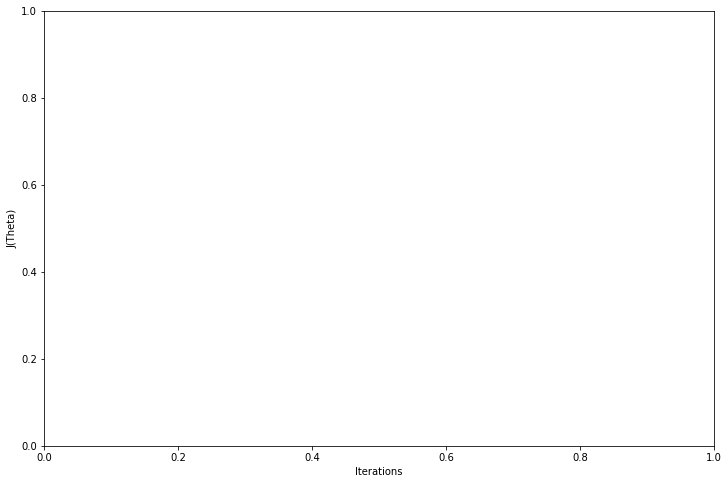

In [10]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

## Statement of Collaboration

https://scikit-learn.org/stable/modules/linear_model.html
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

I worked with Tucker and Matt and Ryan on this project. 